✅ Successfully imported FootballEDA
📊 Starting Football Prospect Analysis
📥 Loading data from C:\Users\Nanaba\Desktop\football_player_scouting_ml\data\processed\fifa_players_engineered.csv...


2025-07-08 04:12:12,244 - INFO - Loading data from: C:\Users\Nanaba\Desktop\football_player_scouting_ml\data\processed\fifa_players_engineered.csv


✅ Loaded 45629 records with 83 features


2025-07-08 04:12:13,536 - INFO - Loaded 45629 records with 83 columns
2025-07-08 04:12:13,858 - INFO - Missing values after cleaning: 0



🔍 Running comprehensive EDA...


2025-07-08 04:55:27,953 - INFO - PDF report saved to: C:\Users\Nanaba\Desktop\football_player_scouting_ml\data\reports\eda_outputs\reports\full_eda_report.pdf



✅ Analysis completed successfully!
📄 Reports saved to: C:\Users\Nanaba\Desktop\football_player_scouting_ml\data\reports\eda_outputs

📈 Visualizing Key Prospect Features:


<Figure size 1200x1000 with 0 Axes>

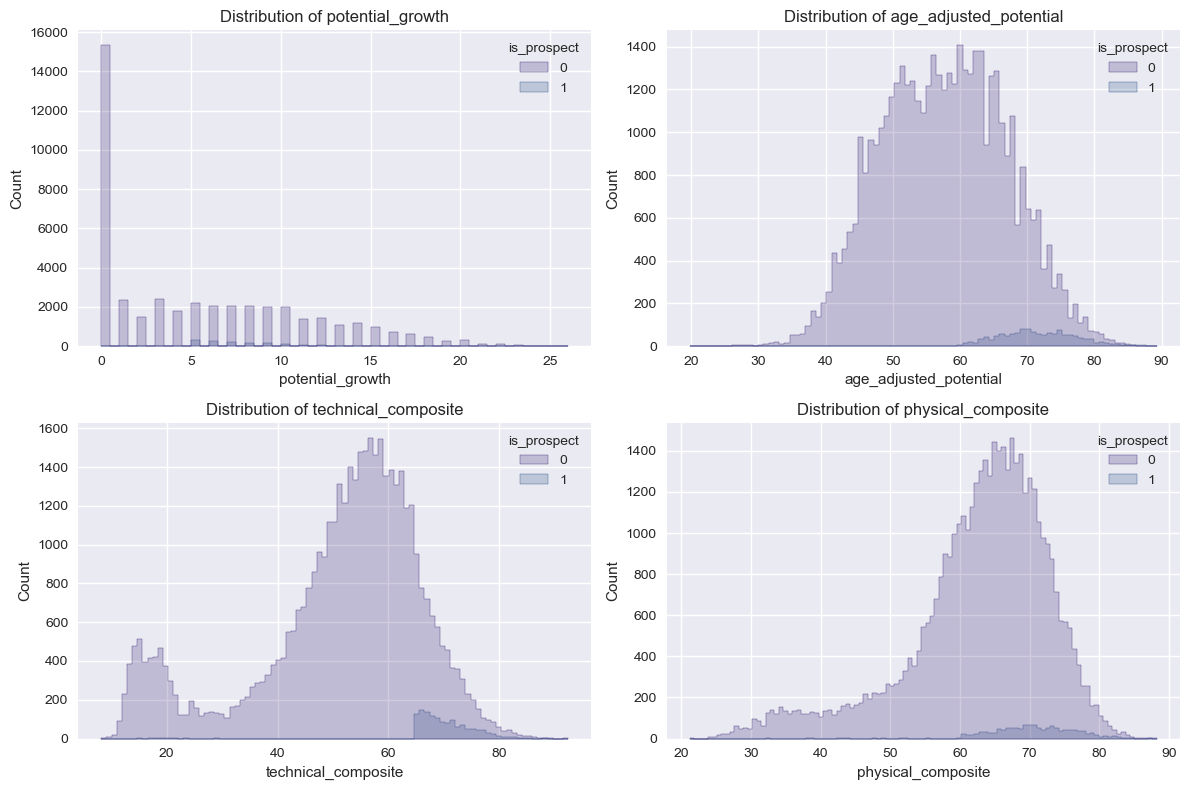

In [1]:
# %% [markdown]
# %%
# Imports with additional type handling
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import json
from typing import Dict, Any

# Add src directory to path
src_path = Path(r"C:\Users\Nanaba\Desktop\football_player_scouting_ml\src")
sys.path.append(str(src_path))

# %%
# Import with error handling
try:
    from professional_analysis import FootballEDA
    print(" Successfully imported FootballEDA")
except ImportError as e:
    print(f" Import Error: {e}")
    raise

# %%
# Configuration with type-safe paths
DATA_DIR = Path(r"C:\Users\Nanaba\Desktop\football_player_scouting_ml\data")
PROCESSED_PATH = DATA_DIR / "processed" / "fifa_players_engineered.csv"
OUTPUT_DIR = DATA_DIR / "reports" / "eda_outputs"

# Required columns with type annotations
REQUIRED_COLUMNS = [
    'age', 'overall', 'potential', 'value_eur', 'wage_eur',
    'player_positions', 'international_reputation',
    'is_prospect',  # Our target variable
    'potential_growth', 'age_adjusted_potential',
    'physical_composite', 'technical_composite',
    'defensive_score', 'attacking_score'
]

# %%
# Data loading with type conversion
def load_and_convert_data(file_path: Path) -> pd.DataFrame:
    """Load data and ensure proper types"""
    df = pd.read_csv(file_path)
    
    # Convert potential problematic columns
    float_cols = ['value_eur', 'wage_eur', 'potential_growth']
    for col in float_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Ensure target is proper type
    if 'is_prospect' in df.columns:
        df['is_prospect'] = df['is_prospect'].astype(int)
    
    return df

# %%
# Main execution with error handling
def main():
    try:
        print(" Starting Football Prospect Analysis")
        
        # Load and convert data
        print(f" Loading data from {PROCESSED_PATH}...")
        df = load_and_convert_data(PROCESSED_PATH)
        print(f" Loaded {len(df)} records with {len(df.columns)} features")
        
        # Initialize EDA with type-safe config
        eda = FootballEDA(
            data_path=PROCESSED_PATH,
            output_dir=OUTPUT_DIR,
            required_columns=REQUIRED_COLUMNS
        )
        
        # Execute analysis
        print("\n Running comprehensive EDA...")
        results = eda.execute_full_analysis()
        
        # Successful completion
        print("\n Analysis completed successfully!")
        print(f" Reports saved to: {OUTPUT_DIR}")
        
        # Feature importance display
        if 'feature_importance' in results:
            print("\n Top Predictive Features:")
            
            # Find the first numeric feature importance dictionary
            importance_dict = None
            for key, value in results['feature_importance'].items():
                if isinstance(value, dict):
                    # Check if any value in the dictionary is numeric
                    if any(isinstance(v, (int, float)) for v in value.values()):
                        importance_dict = value
                        break
            
            if importance_dict:
                top_features = sorted(
                    importance_dict.items(),
                    key=lambda x: abs(x[1]) if isinstance(x[1], (int, float)) else 0,
                    reverse=True
                )[:5]
                for feature, importance in top_features:
                    print(f"- {feature}: {importance:.3f}")
            else:
                print(" No numeric feature importance values found")
        
        # Additional visualization
        if 'df' in locals():
            try:
                print("\n Visualizing Key Prospect Features:")
                
                # Plot top features
                plot_features = [
                    'potential_growth',
                    'age_adjusted_potential',
                    'technical_composite',
                    'physical_composite'
                ]
                
                # Ensure we only plot existing features
                plot_features = [f for f in plot_features if f in df.columns]
                
                if plot_features:
                    import matplotlib.pyplot as plt
                    import seaborn as sns
                    
                    plt.figure(figsize=(12, 8))
                    for i, col in enumerate(plot_features, 1):
                        plt.subplot(2, 2, i)
                        sns.histplot(data=df, x=col, hue='is_prospect', element='step')
                        plt.title(f'Distribution of {col}')
                    plt.tight_layout()
                    plt.show()
                else:
                    print(" No valid features found for plotting")
                    
            except Exception as e:
                print(f" Visualization error: {str(e)}")
    
    except Exception as e:
        print(f"\n Analysis failed: {str(e)}")
        raise

if __name__ == "__main__":
    main()